In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:

file_path = '/content/german_credit_data.csv'
try:
    df = pd.read_csv(file_path, index_col=0)
    print(f"Dataset loaded successfully from: {file_path}")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    print("Please ensure the file path and name are correct.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Dataset loaded successfully from: /content/german_credit_data.csv


In [ ]:
print("First 5 rows of the dataset:")
if 'df' in locals() and not df.empty:
    display(df.head())
    print(f"\nDataset dimensions (rows, columns): {df.shape}")

    print("\nDataset information (column types and non-null counts):")
    df.info()

    print("\nColumn names:")
    print(list(df.columns))
else:
    print("\nDataFrame 'df' is not available or empty. Cannot perform inspection.")

First 5 rows of the dataset:


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car



Dataset dimensions (rows, columns): (1000, 9)

Dataset information (column types and non-null counts):
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB

Column names:
['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']


# Proceed with Clustering as RISK is not included

In [ ]:

if 'df' in locals() and not df.empty:
    df_processed = df.copy()
    print("Working copy of the DataFrame created.")
else:
    print("DataFrame 'df' not found or is empty. Please load the data first.")
    raise ValueError("DataFrame 'df' is not available.")

Working copy of the DataFrame created.


In [ ]:

missing_cols = ['Saving accounts', 'Checking account']
print(f"Columns to check for missing values: {missing_cols}")
for col in missing_cols:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].fillna('Unknown')
        print(f"Missing values in '{col}' handled.")
print("\nMissing values count after handling:")
print(df_processed.isnull().sum())


Columns to check for missing values: ['Saving accounts', 'Checking account']
Missing values in 'Saving accounts' handled.
Missing values in 'Checking account' handled.

Missing values count after handling:
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64


In [ ]:
import pandas as pd
categorical_cols = df_processed.select_dtypes(include='object').columns
print(f"Categorical columns to encode: {list(categorical_cols)}")

df_encoded = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=False)

print(f"\nDataFrame shape after One-Hot Encoding: {df_encoded.shape}")
print("First 5 rows of the encoded DataFrame (showing some columns):")
print(df_encoded.info())

Categorical columns to encode: ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

DataFrame shape after One-Hot Encoding: (1000, 26)
First 5 rows of the encoded DataFrame (showing some columns):
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1000 non-null   int64
 1   Job                          1000 non-null   int64
 2   Credit amount                1000 non-null   int64
 3   Duration                     1000 non-null   int64
 4   Sex_female                   1000 non-null   bool 
 5   Sex_male                     1000 non-null   bool 
 6   Housing_free                 1000 non-null   bool 
 7   Housing_own                  1000 non-null   bool 
 8   Housing_rent                 1000 non-null   bool 
 9   Saving accounts_Unknown      1000 non-null   bool 
 10  Saving a

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

try:
   numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
except NameError:
   numerical_cols = ['Age', 'Job', 'Credit amount', 'Duration']
   print("Warning: Original DataFrame 'df' not found, using explicit list for numerical columns.")

print(f"Original numerical columns identified: {numerical_cols}")

numerical_cols_in_encoded = [col for col in numerical_cols if col in df_encoded.columns]

if len(numerical_cols_in_encoded) != len(numerical_cols):
   print("Warning: Some expected numerical columns were not found in the encoded DataFrame.")
   print(f"Columns found and being scaled: {numerical_cols_in_encoded}")
else:
   print(f"Numerical columns to be scaled: {numerical_cols_in_encoded}")

scaler = StandardScaler()

if numerical_cols_in_encoded:
   df_encoded[numerical_cols_in_encoded] = scaler.fit_transform(df_encoded[numerical_cols_in_encoded])
   print("\nNumerical features scaled successfully using StandardScaler.")
   print("Showing the first 5 rows of the scaled numerical features:")
   display(df_encoded[numerical_cols_in_encoded].head())
else:
   print("\nError: No numerical columns were found to scale.")

df_final_processed = df_encoded
print("\nPreprocessing complete.")
print("The 'df_final_processed' DataFrame is now ready for clustering.")
print(f"Final DataFrame shape: {df_final_processed.shape}")

Original numerical columns identified: ['Age', 'Job', 'Credit amount', 'Duration']
Numerical columns to be scaled: ['Age', 'Job', 'Credit amount', 'Duration']

Numerical features scaled successfully using StandardScaler.
Showing the first 5 rows of the scaled numerical features:


,Age,Job,Credit amount,Duration
0,2.766456,0.146949,-0.745131,-1.236478
1,-1.191404,0.146949,0.949817,2.248194
2,1.183312,-1.383771,-0.416562,-0.738668
3,0.831502,0.146949,1.634247,1.750384
4,1.535122,0.146949,0.566664,0.256953



Preprocessing complete.
The 'df_final_processed' DataFrame is now ready for clustering.
Final DataFrame shape: (1000, 26)


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

try:
   numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
except NameError:
   numerical_cols = ['Age', 'Job', 'Credit amount', 'Duration']
   print("Warning: Original DataFrame 'df' not found, using explicit list for numerical columns.")

print(f"Original numerical columns identified: {numerical_cols}")

numerical_cols_in_encoded = [col for col in numerical_cols if col in df_encoded.columns]

if len(numerical_cols_in_encoded) != len(numerical_cols):
   print("Warning: Some expected numerical columns were not found in the encoded DataFrame.")
   print(f"Columns found and being scaled: {numerical_cols_in_encoded}")
else:
   print(f"Numerical columns to be scaled: {numerical_cols_in_encoded}")

scaler = StandardScaler()

if numerical_cols_in_encoded:
   df_encoded[numerical_cols_in_encoded] = scaler.fit_transform(df_encoded[numerical_cols_in_encoded])
   print("\nNumerical features scaled successfully using StandardScaler.")
   print("Showing the first 5 rows of the scaled numerical features:")
   display(df_encoded[numerical_cols_in_encoded].head())
else:
   print("\nError: No numerical columns were found to scale.")

df_final_processed = df_encoded
print("\nPreprocessing complete.")
print("The 'df_final_processed' DataFrame is now ready for clustering.")
print(f"Final DataFrame shape: {df_final_processed.shape}")

Original numerical columns identified: ['Age', 'Job', 'Credit amount', 'Duration']
Numerical columns to be scaled: ['Age', 'Job', 'Credit amount', 'Duration']

Numerical features scaled successfully using StandardScaler.
Showing the first 5 rows of the scaled numerical features:


,Age,Job,Credit amount,Duration
0,2.766456,0.146949,-0.745131,-1.236478
1,-1.191404,0.146949,0.949817,2.248194
2,1.183312,-1.383771,-0.416562,-0.738668
3,0.831502,0.146949,1.634247,1.750384
4,1.535122,0.146949,0.566664,0.256953



Preprocessing complete.
The 'df_final_processed' DataFrame is now ready for clustering.
Final DataFrame shape: (1000, 26)



Calculating WCSS for K=1 to 10...
  WCSS for K=1: 6916.71
  WCSS for K=2: 5701.33
  WCSS for K=3: 5152.09
  WCSS for K=4: 4687.87
  WCSS for K=5: 4486.65
  WCSS for K=6: 4256.21
  WCSS for K=7: 4144.26
  WCSS for K=8: 4023.08
  WCSS for K=9: 3950.49
  WCSS for K=10: 3872.45

Plotting the Elbow Method curve...


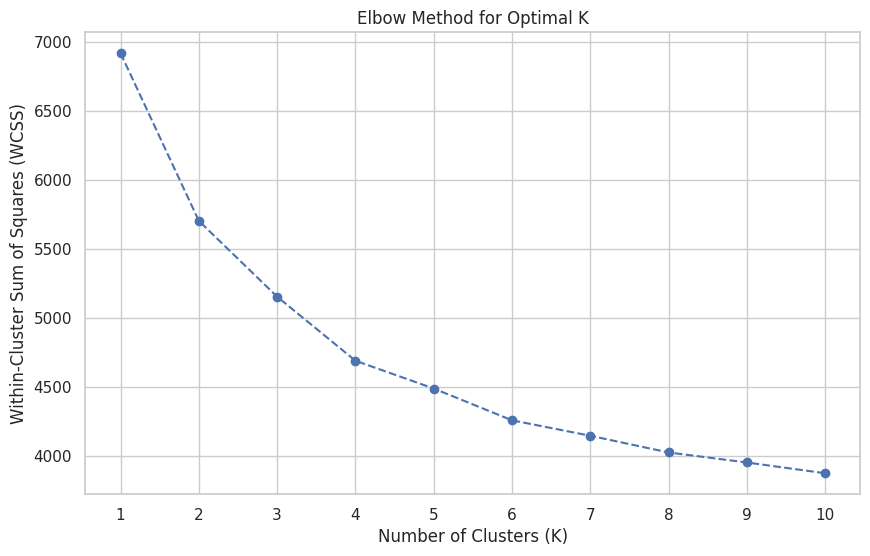

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
k_range = range(1, 11)

print("\nCalculating WCSS for K=1 to 10...")
for k in k_range:
   kmeans_elbow = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
   kmeans_elbow.fit(df_final_processed)
   wcss.append(kmeans_elbow.inertia_)
   print(f"  WCSS for K={k}: {kmeans_elbow.inertia_:.2f}")

print("\nPlotting the Elbow Method curve...")
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [ ]:
chosen_k = 4

print(f"\nApplying K-Means with the chosen K = {chosen_k}...")

kmeans_final = KMeans(n_clusters=chosen_k, init='k-means++', n_init='auto', random_state=42)

cluster_labels = kmeans_final.fit_predict(df_final_processed)

try:
   df_clustered = df_processed.copy()
   df_clustered['Cluster'] = cluster_labels
   print(f"\nK-Means clustering complete. Cluster labels (0 to {chosen_k-1}) assigned.")

   print(f"\nValue counts for each cluster (K={chosen_k}):")
   print(df_clustered['Cluster'].value_counts().sort_index())

   print("\nFirst 5 rows of the data with Cluster labels:")
   display(df_clustered.head())

except NameError:
   print("\nError: 'df_processed' DataFrame not found.")
   print("Cannot add cluster labels for analysis. Please ensure 'df_processed' is available.")


Applying K-Means with the chosen K = 4...

K-Means clustering complete. Cluster labels (0 to 3) assigned.

Value counts for each cluster (K=4):
Cluster
0    181
1    460
2    192
3    167
Name: count, dtype: int64

First 5 rows of the data with Cluster labels:


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Cluster
0,67,male,2,own,Unknown,little,1169,6,radio/TV,3
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,Unknown,2096,12,education,2
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,3


In [ ]:
if 'df_clustered' in locals():
   print(f"\nAnalyzing characteristics of the {chosen_k} clusters:")

   if 'numerical_cols' not in locals():
       numerical_cols = ['Age', 'Job', 'Credit amount', 'Duration']
   print("\nAverage values of numerical features per cluster:")
   numerical_summary = df_clustered.groupby('Cluster')[numerical_cols].mean()
   display(numerical_summary)

   if 'categorical_cols' not in locals():
        categorical_cols = df_processed.select_dtypes(include='object').columns
   categorical_analysis_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
   categorical_analysis_cols = [col for col in categorical_analysis_cols if col in df_clustered.columns]

   print("\nMost frequent categories for selected categorical features per cluster:")
   for col in categorical_analysis_cols:
       print(f"\n--- Analysis for: {col} ---")
       mode_summary = df_clustered.groupby('Cluster')[col].agg(lambda x: x.mode().tolist())
       display(mode_summary)

else:
   print("\nCluster analysis skipped because 'df_clustered' DataFrame is not available.")


Analyzing characteristics of the 4 clusters:

Average values of numerical features per cluster:


,Age,Job,Credit amount,Duration
Cluster,,,,
0,35.198895,2.287293,7754.364641,39.337017
1,29.656522,2.126087,2288.091304,17.686957
2,34.854167,0.885417,2094.635417,15.119792
3,52.940120,2.047904,2473.209581,16.431138



Most frequent categories for selected categorical features per cluster:

--- Analysis for: Sex ---


,Sex
Cluster,
0,[male]
1,[male]
2,[male]
3,[male]



--- Analysis for: Housing ---


,Housing
Cluster,
0,[own]
1,[own]
2,[own]
3,[own]



--- Analysis for: Saving accounts ---


,Saving accounts
Cluster,
0,[little]
1,[little]
2,[little]
3,[little]



--- Analysis for: Checking account ---


,Checking account
Cluster,
0,[moderate]
1,[Unknown]
2,[Unknown]
3,[Unknown]



--- Analysis for: Purpose ---


,Purpose
Cluster,
0,[car]
1,[radio/TV]
2,[car]
3,[car]



Generating Box Plots for Numerical Features per Cluster...


<ipython-input-21-3e5ec2983d98>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_clustered, palette='viridis')
<ipython-input-21-3e5ec2983d98>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_clustered, palette='viridis')
<ipython-input-21-3e5ec2983d98>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_clustered, palette='viridis')
<ipython-input-21-3e5ec2983d98>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remove

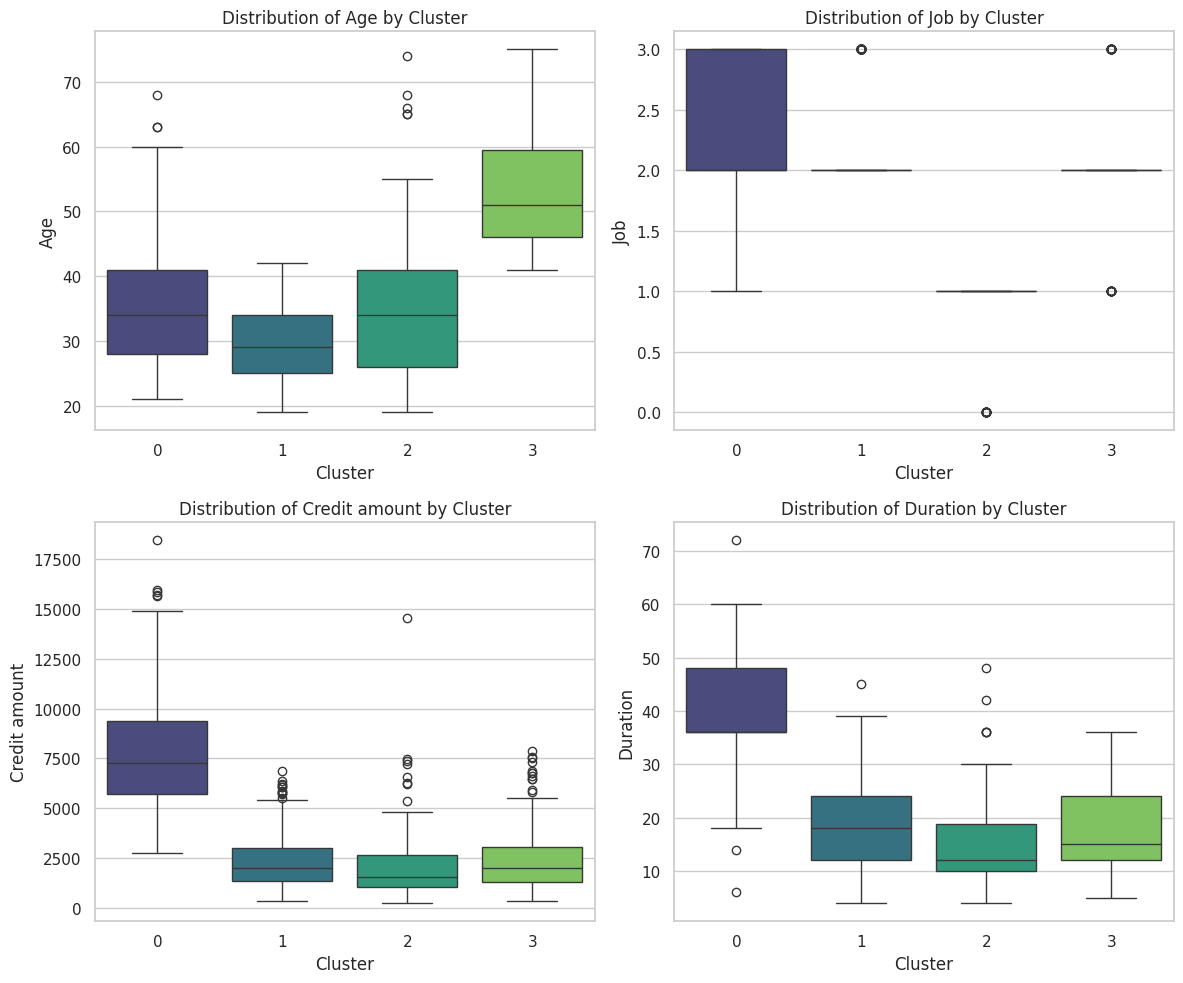

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'df_clustered' in locals() and 'numerical_cols' in locals():
   print("\nGenerating Box Plots for Numerical Features per Cluster...")
   n_cols = 2
   n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

   plt.figure(figsize=(12, n_rows * 5))

   for i, col in enumerate(numerical_cols):
       plt.subplot(n_rows, n_cols, i + 1)
       sns.boxplot(x='Cluster', y=col, data=df_clustered, palette='viridis')
       plt.title(f'Distribution of {col} by Cluster')
       plt.xlabel('Cluster')
       plt.ylabel(col)

   plt.tight_layout()
   plt.show()
else:
   print("\nSkipping numerical visualizations: 'df_clustered' or 'numerical_cols' not available.")


Generating Count Plots for Categorical Features per Cluster...


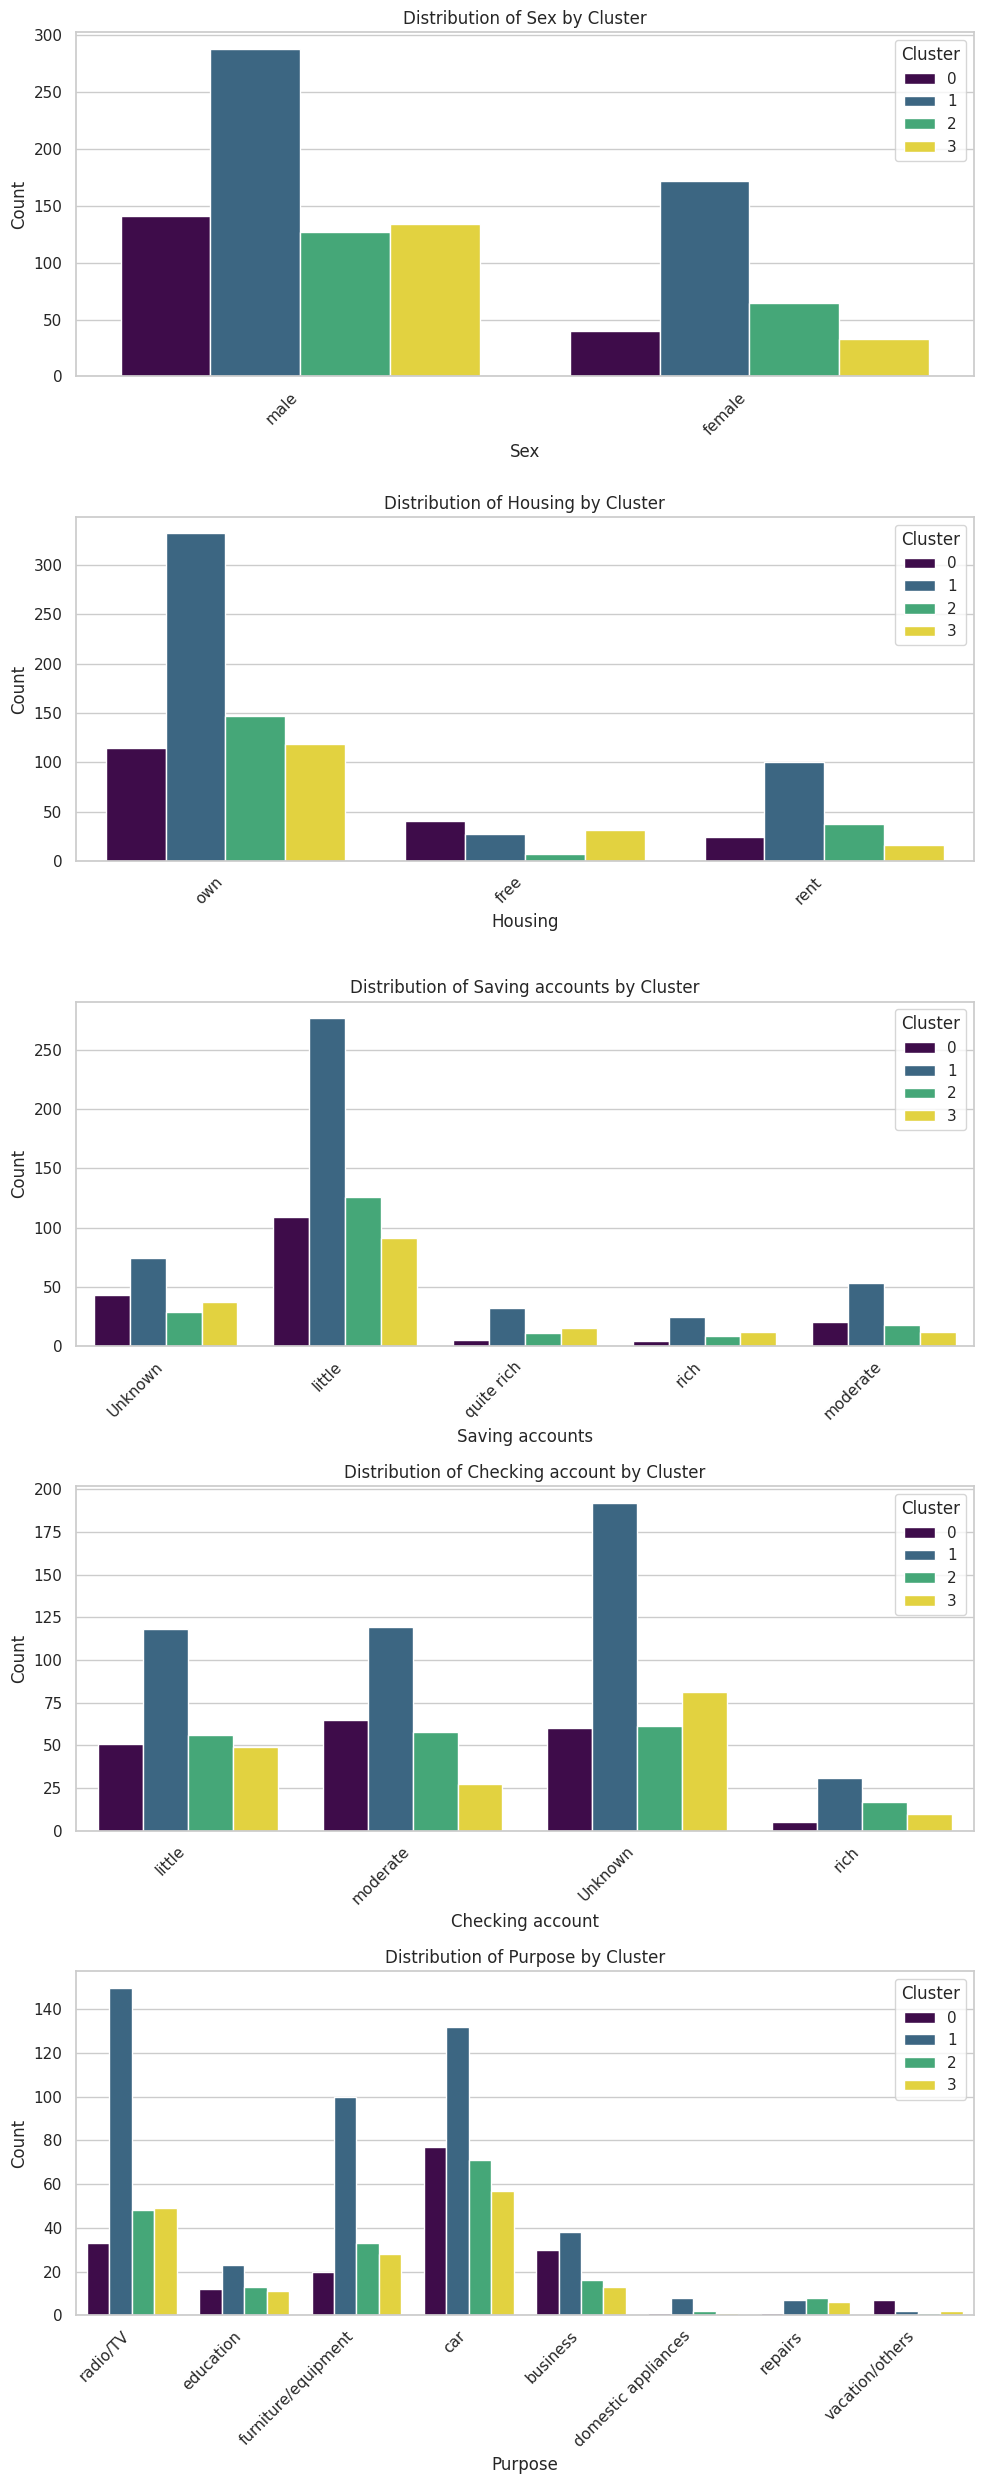

In [ ]:
if 'df_clustered' in locals() and 'categorical_analysis_cols' in locals():
   print("\nGenerating Count Plots for Categorical Features per Cluster...")
   n_cols = 1
   n_rows = len(categorical_analysis_cols)

   plt.figure(figsize=(10, n_rows * 5))

   for i, col in enumerate(categorical_analysis_cols):
       plt.subplot(n_rows, n_cols, i + 1)
       sns.countplot(data=df_clustered, x=col, hue='Cluster', palette='viridis')
       plt.title(f'Distribution of {col} by Cluster')
       plt.xlabel(col)
       plt.ylabel('Count')
       plt.xticks(rotation=45, ha='right')
       plt.legend(title='Cluster')

   plt.tight_layout()
   plt.show()
else:
   print("\nSkipping categorical visualizations: 'df_clustered' or 'categorical_analysis_cols' not available.")


Applying PCA to visualize clusters in 2D...


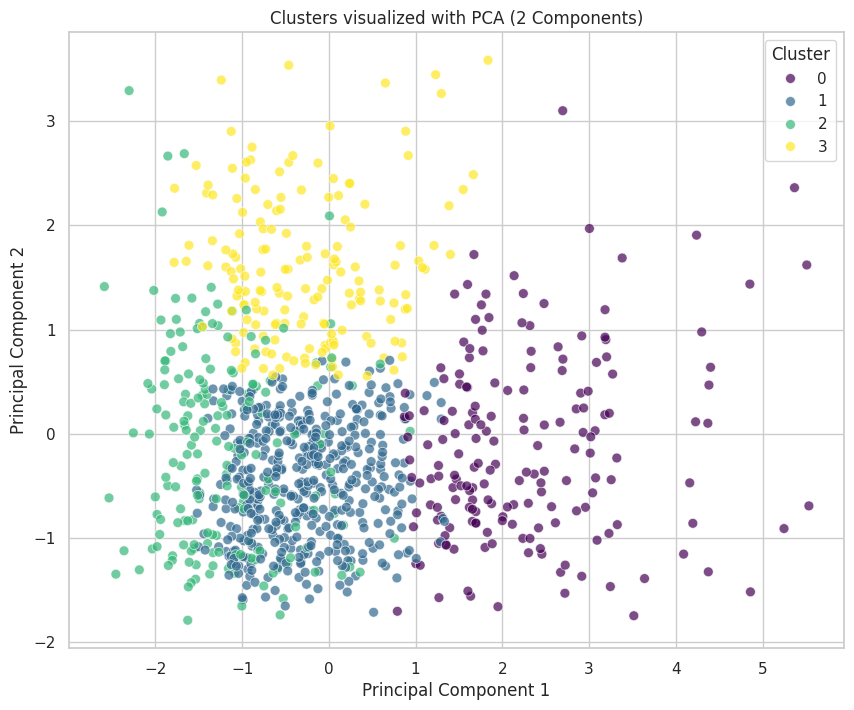

Variance explained by PCA Component 1: 26.19%
Variance explained by PCA Component 2: 15.24%
Total variance explained by first 2 components: 41.43%


In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

if 'df_final_processed' in locals() and 'cluster_labels' in locals():
    print("\nApplying PCA to visualize clusters in 2D...")
    pca = PCA(n_components=2, random_state=42)
    pca_components = pca.fit_transform(df_final_processed)
    df_pca = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
    df_pca['Cluster'] = cluster_labels

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', alpha=0.7, s=50)
    plt.title('Clusters visualized with PCA (2 Components)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

    explained_variance = pca.explained_variance_ratio_
    print(f"Variance explained by PCA Component 1: {explained_variance[0]:.2%}")
    print(f"Variance explained by PCA Component 2: {explained_variance[1]:.2%}")
    print(f"Total variance explained by first 2 components: {explained_variance.sum():.2%}")
else:
    print("\nSkipping PCA visualization: 'df_final_processed' or 'cluster_labels' not available.")


Required libraries imported successfully.
Successfully loaded dataset from: /content/german_credit_data.csv

First few rows of the dataset:


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car



Dataset shape: (1000, 9)

Dataset summary:
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB

Column names: ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration', 'Purpose']

Created a working copy of the dataset.
Missing values in 'Saving accounts' replaced with 'Unknown'.
Missing values in 'Checking account' replaced with 'Unknown'.

Missing 

<ipython-input-24-d0bc4a04a7dd>:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[column].fillna('Unknown', inplace=True)


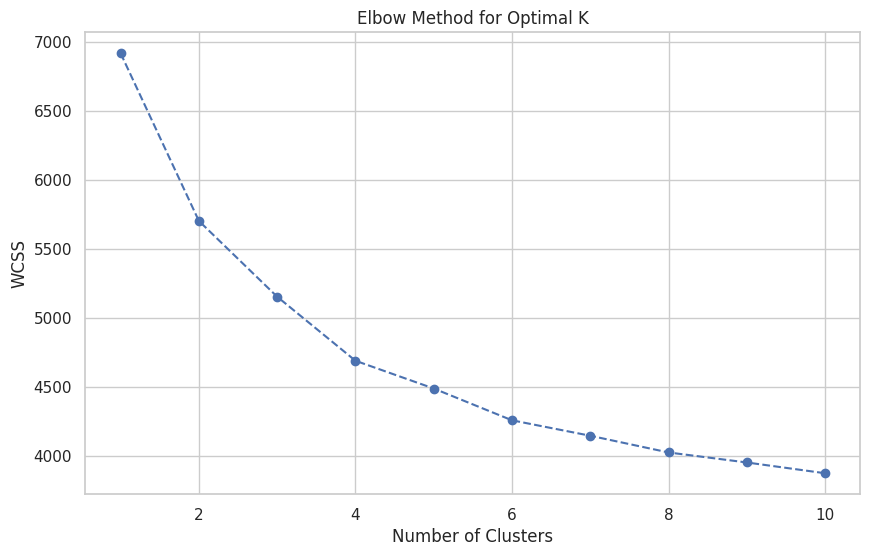


Applying KMeans with K=4...

Clusters assigned to data.
Cluster
0    181
1    460
2    192
3    167
Name: count, dtype: int64

Cluster-wise summary of numerical features:


,Age,Job,Credit amount,Duration
Cluster,,,,
0,35.198895,2.287293,7754.364641,39.337017
1,29.656522,2.126087,2288.091304,17.686957
2,34.854167,0.885417,2094.635417,15.119792
3,52.940120,2.047904,2473.209581,16.431138



Cluster-wise mode of selected categorical features:

Most frequent values in 'Sex':


,Sex
Cluster,
0,[male]
1,[male]
2,[male]
3,[male]



Most frequent values in 'Housing':


,Housing
Cluster,
0,[own]
1,[own]
2,[own]
3,[own]



Most frequent values in 'Saving accounts':


,Saving accounts
Cluster,
0,[little]
1,[little]
2,[little]
3,[little]



Most frequent values in 'Checking account':


,Checking account
Cluster,
0,[moderate]
1,[Unknown]
2,[Unknown]
3,[Unknown]



Most frequent values in 'Purpose':


,Purpose
Cluster,
0,[car]
1,[radio/TV]
2,[car]
3,[car]


<ipython-input-24-d0bc4a04a7dd>:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_clustered, palette='coolwarm')
<ipython-input-24-d0bc4a04a7dd>:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_clustered, palette='coolwarm')
<ipython-input-24-d0bc4a04a7dd>:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=col, data=df_clustered, palette='coolwarm')
<ipython-input-24-d0bc4a04a7dd>:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be

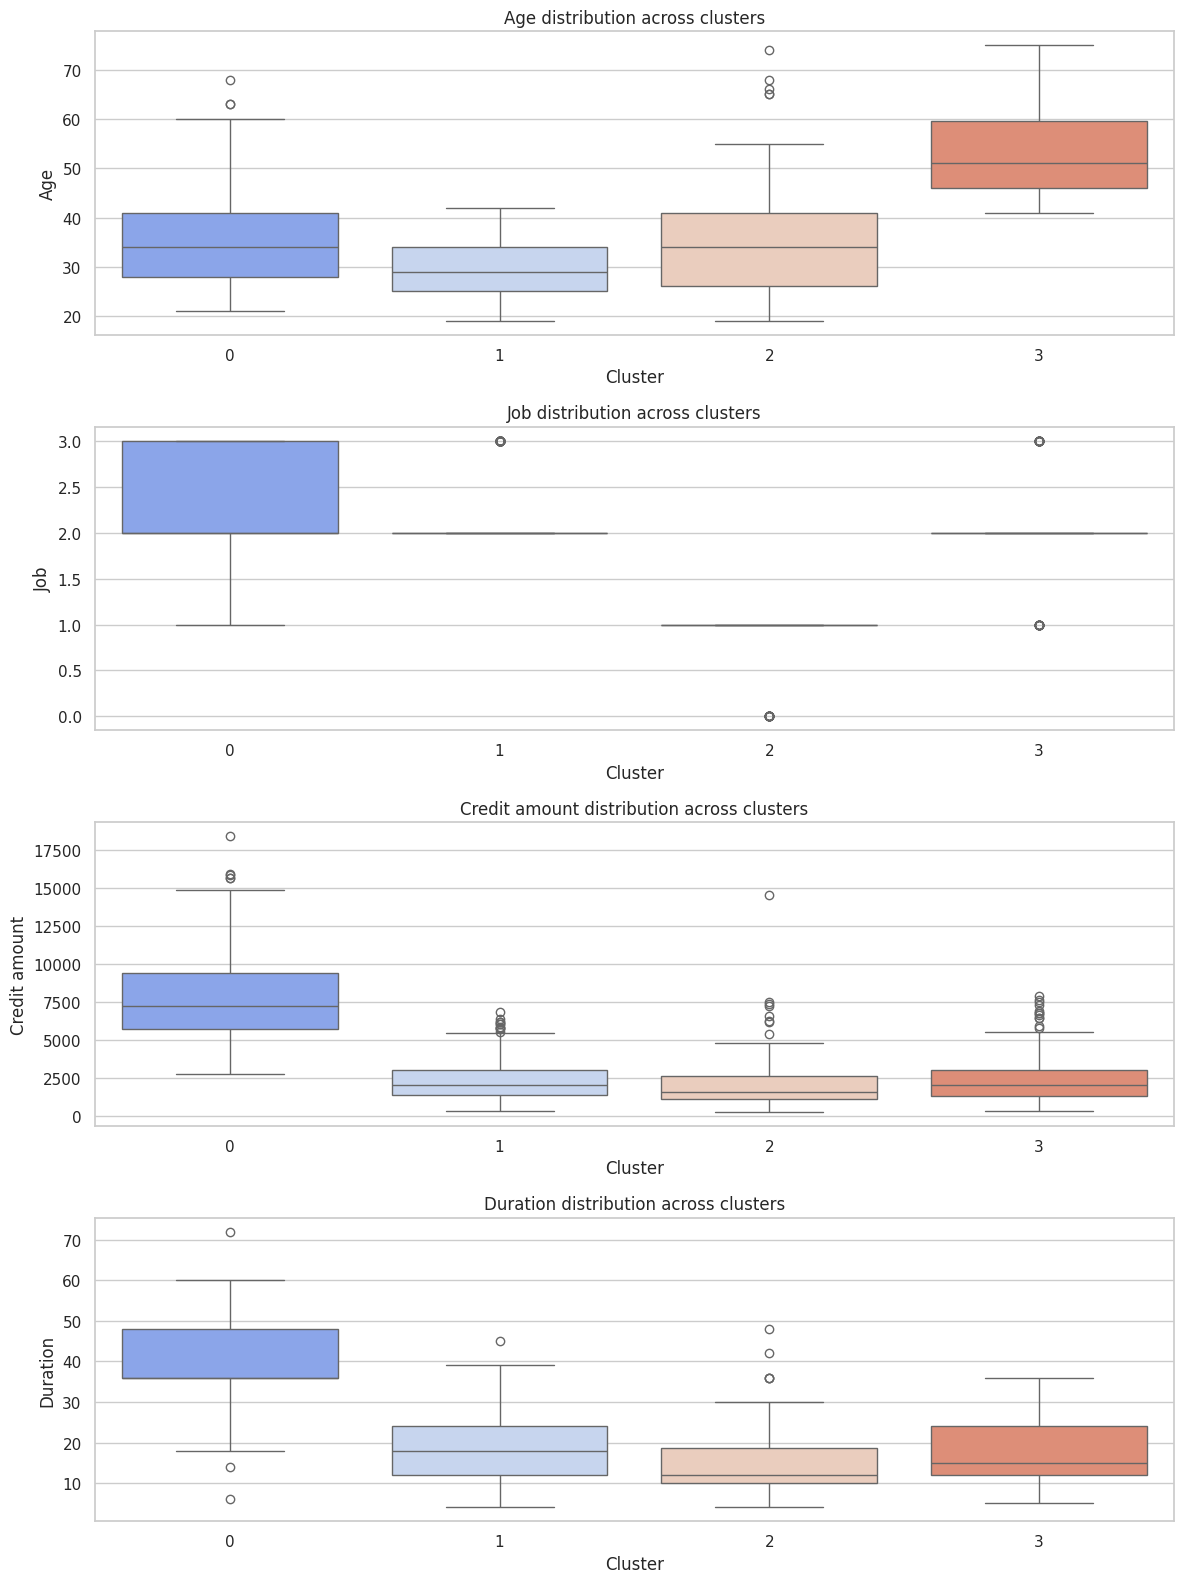

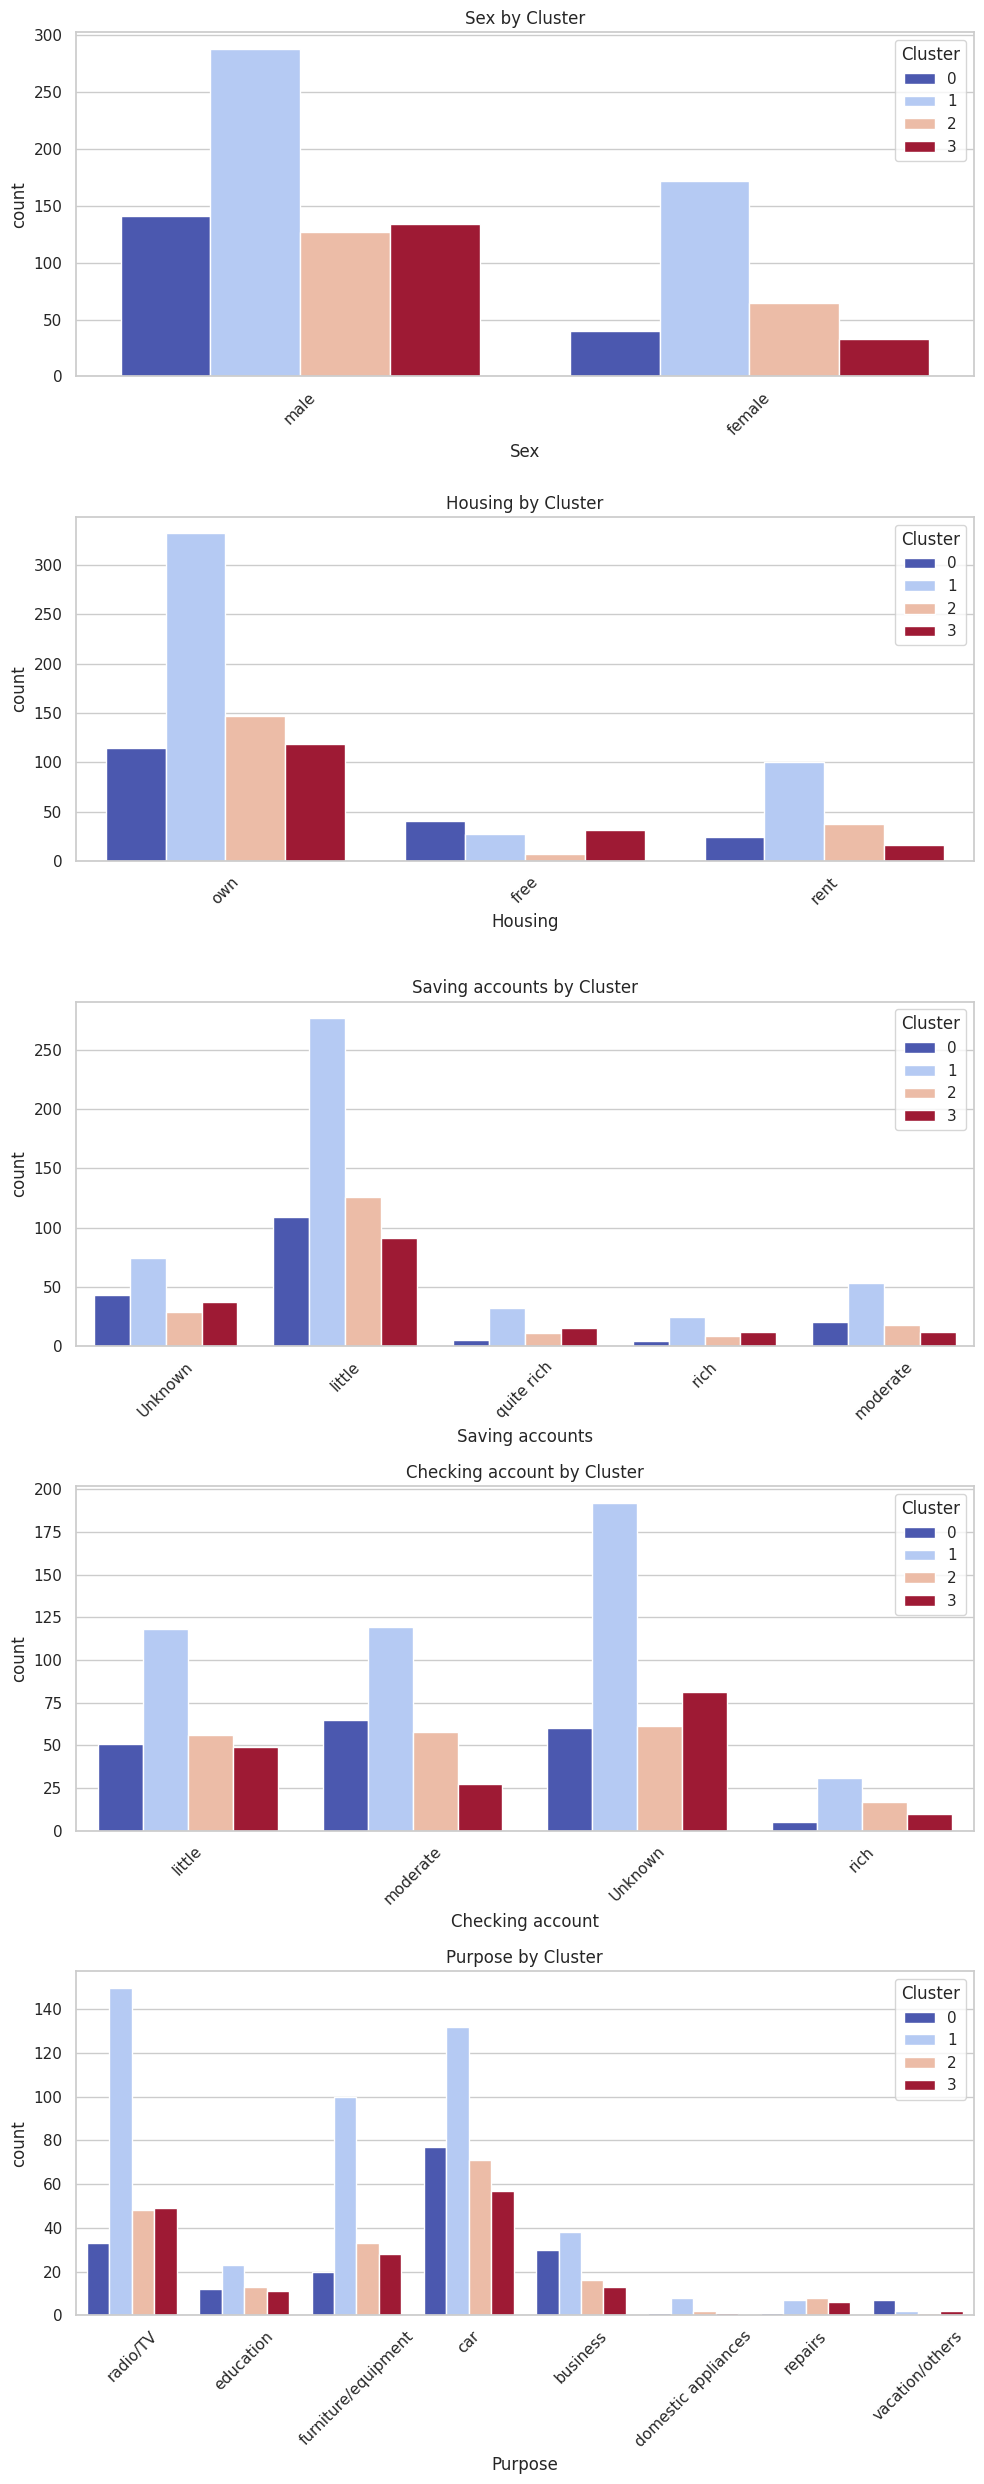

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Display settings
sns.set(style="whitegrid")

# Discover and list files in Kaggle input directory (if applicable)
for root, _, files in os.walk('/kaggle/input'):
    for name in files:
        print(os.path.join(root, name))

print("Required libraries imported successfully.")

# Load the dataset
file_path = '/content/german_credit_data.csv'
try:
    df = pd.read_csv(file_path, index_col=0)
    print(f"Successfully loaded dataset from: {file_path}")
except FileNotFoundError:
    print(f"File not found at: {file_path}. Please check the path.")
    df = pd.DataFrame()
except Exception as e:
    print(f"Unexpected error while loading dataset: {e}")
    df = pd.DataFrame()

# Preview and inspect dataset
if not df.empty:
    print("\nFirst few rows of the dataset:")
    display(df.head())
    print(f"\nDataset shape: {df.shape}")
    print("\nDataset summary:")
    df.info()
    print("\nColumn names:", df.columns.tolist())
else:
    raise ValueError("Dataset is empty or not loaded properly.")

# Data preparation
df_processed = df.copy()
print("\nCreated a working copy of the dataset.")

# Handle missing values
missing_cols = ['Saving accounts', 'Checking account']
for column in missing_cols:
    if column in df_processed.columns:
        df_processed[column].fillna('Unknown', inplace=True)
        print(f"Missing values in '{column}' replaced with 'Unknown'.")

print("\nMissing value summary:")
print(df_processed.isnull().sum())

# Encode categorical variables
categorical_columns = df_processed.select_dtypes(include='object').columns.tolist()
print("\nEncoding categorical features:", categorical_columns)
df_encoded = pd.get_dummies(df_processed, columns=categorical_columns, drop_first=False)

print(f"\nEncoded dataset shape: {df_encoded.shape}")
df_encoded.info()

# Scale numerical features
try:
    numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
except NameError:
    numeric_columns = ['Age', 'Job', 'Credit amount', 'Duration']
    print("Using fallback list of numerical columns.")

numeric_columns_in_encoded = [col for col in numeric_columns if col in df_encoded.columns]
if not numeric_columns_in_encoded:
    raise ValueError("No valid numerical columns found in encoded dataset.")

scaler = StandardScaler()
df_encoded[numeric_columns_in_encoded] = scaler.fit_transform(df_encoded[numeric_columns_in_encoded])
print("\nNumerical features scaled successfully.")

# Final processed dataset
df_final_processed = df_encoded
print("\nData preprocessing completed. Ready for clustering.")
print(f"Final dataset shape: {df_final_processed.shape}")

# Determine optimal number of clusters using Elbow method
wcss = []
print("\nCalculating WCSS for different values of K:")
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(df_final_processed)
    wcss.append(kmeans.inertia_)
    print(f"K={k}: WCSS={kmeans.inertia_:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Apply KMeans with chosen K
chosen_k = 4
print(f"\nApplying KMeans with K={chosen_k}...")
kmeans_final = KMeans(n_clusters=chosen_k, init='k-means++', n_init='auto', random_state=42)
labels = kmeans_final.fit_predict(df_final_processed)

# Assign cluster labels to original data
df_clustered = df_processed.copy()
df_clustered['Cluster'] = labels
print("\nClusters assigned to data.")
print(df_clustered['Cluster'].value_counts().sort_index())

# Cluster-wise analysis
print("\nCluster-wise summary of numerical features:")
display(df_clustered.groupby('Cluster')[numeric_columns].mean())

selected_categorical = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
selected_categorical = [col for col in selected_categorical if col in df_clustered.columns]

print("\nCluster-wise mode of selected categorical features:")
for col in selected_categorical:
    print(f"\nMost frequent values in '{col}':")
    display(df_clustered.groupby('Cluster')[col].agg(lambda x: x.mode().tolist()))

# Visualize numerical distributions per cluster
plt.figure(figsize=(12, len(numeric_columns) * 4))
for idx, col in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 1, idx + 1)
    sns.boxplot(x='Cluster', y=col, data=df_clustered, palette='coolwarm')
    plt.title(f'{col} distribution across clusters')
plt.tight_layout()
plt.show()

# Visualize categorical distributions per cluster
plt.figure(figsize=(10, len(selected_categorical) * 5))
for idx, col in enumerate(selected_categorical):
    plt.subplot(len(selected_categorical), 1, idx + 1)
    sns.countplot(x=col, hue='Cluster', data=df_clustered, palette='coolwarm')
    plt.title(f'{col} by Cluster')
    plt.xticks(rotation=45)
    plt.legend(title='Cluster')
plt.tight_layout()
plt.show()